In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/IQ-OTH_NCCD lung cancer dataset.txt
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (246).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (155).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (311).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (45).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (298).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (359).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (230).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-O

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

In [3]:
data = []
result = []
def loadimgs(path):
    l1 = os.listdir(path)
    for i in l1:
        if(i != "IQ-OTH_NCCD lung cancer dataset.txt"):
            l2 = os.listdir(path+'/'+i)
            for j in l2:
                img = Image.open(path+'/'+i+'/'+j)
                img = img.resize(size = (256,256))
                data.append(np.array(img))
                result.append(i)
                del img
#     %matplotlib inline
#     plt.figure(figsize=(10, 10))
#     for i in range(4):
#         plt.subplot(5, 4, i+1)
#         plt.imshow(data[i], cmap="gray")
#         plt.axis('off')
#     plt.show()
    return np.array(data),result
        

In [4]:
x,result = loadimgs("/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset")

In [5]:
# x = np.array(x)
x

array([[[[38, 38, 38],
         [38, 38, 38],
         [38, 38, 38],
         ...,
         [38, 38, 38],
         [38, 38, 38],
         [38, 38, 38]],

        [[38, 38, 38],
         [38, 38, 38],
         [38, 38, 38],
         ...,
         [38, 38, 38],
         [38, 38, 38],
         [38, 38, 38]],

        [[38, 38, 38],
         [38, 38, 38],
         [38, 38, 38],
         ...,
         [38, 38, 38],
         [38, 38, 38],
         [38, 38, 38]],

        ...,

        [[38, 38, 38],
         [38, 38, 38],
         [38, 38, 38],
         ...,
         [38, 38, 38],
         [38, 38, 38],
         [38, 38, 38]],

        [[38, 38, 38],
         [38, 38, 38],
         [38, 38, 38],
         ...,
         [38, 38, 38],
         [38, 38, 38],
         [38, 38, 38]],

        [[38, 38, 38],
         [38, 38, 38],
         [38, 38, 38],
         ...,
         [38, 38, 38],
         [38, 38, 38],
         [38, 38, 38]]],


       [[[38, 38, 38],
         [38, 38, 38],
         [38, 

In [6]:
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [8]:
t = pd.Series(result,dtype = 'category').cat.codes
t

0       2
1       2
2       2
3       2
4       2
       ..
1092    1
1093    1
1094    1
1095    1
1096    1
Length: 1097, dtype: int8

In [9]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,t,test_size=0.2,shuffle=True)

In [10]:
train_x

array([[[[38, 38, 38],
         [38, 38, 38],
         [38, 38, 38],
         ...,
         [38, 38, 38],
         [38, 38, 38],
         [38, 38, 38]],

        [[38, 38, 38],
         [38, 38, 38],
         [38, 38, 38],
         ...,
         [38, 38, 38],
         [38, 38, 38],
         [38, 38, 38]],

        [[38, 38, 38],
         [38, 38, 38],
         [38, 38, 38],
         ...,
         [38, 38, 38],
         [38, 38, 38],
         [38, 38, 38]],

        ...,

        [[38, 38, 38],
         [38, 38, 38],
         [38, 38, 38],
         ...,
         [38, 38, 38],
         [38, 38, 38],
         [38, 38, 38]],

        [[38, 38, 38],
         [38, 38, 38],
         [38, 38, 38],
         ...,
         [38, 38, 38],
         [38, 38, 38],
         [38, 38, 38]],

        [[38, 38, 38],
         [38, 38, 38],
         [38, 38, 38],
         ...,
         [38, 38, 38],
         [38, 38, 38],
         [38, 38, 38]]],


       [[[38, 38, 38],
         [38, 38, 38],
         [38, 

In [11]:
test_y

1043    1
803     1
799     1
180     2
1006    1
       ..
351     2
1094    1
839     1
800     1
883     1
Length: 220, dtype: int8

In [12]:
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout,GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

In [13]:
from tensorflow.keras.layers import Lambda

In [14]:
def second_order_pooling(x):
    # Compute outer product
    outer_product = tf.matmul(tf.expand_dims(x, -1), tf.expand_dims(x, 1))
    # Flatten outer product
    pool_size = [2, 2]  # Size of the pooling window
    stride = [2, 2]   
    #flattened = tf.reshape(outer_product, (-1, tf.shape(x)[1]*tf.shape(x)[1]))
    reshaped_output = tf.expand_dims(outer_product, axis=-1)
    # Normalize the flattened tensor
    pooled_output = tf.nn.max_pool(reshaped_output, ksize=[1, pool_size[0], pool_size[1], 1], strides=[1, stride[0], stride[1], 1], padding='VALID')
    normalized = tf.math.l2_normalize(pooled_output, axis=1)
    
    return normalized

In [15]:
import tensorflow.keras as K
input_v = K.Input(shape=(256,256,3))
modelresnet = K.applications.ResNet50(include_top=False,weights='imagenet',input_tensor = input_v)

94765736/94765736 [==============================] - 3s 0us/step


In [16]:
for layer in modelresnet.layers:
    layer.trainable = False

In [17]:
from tensorflow.keras.layers import MaxPooling2D

In [18]:
num_classes = 3
for (i,layer) in enumerate(modelresnet.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)
    def lw(bottom_model,num_classes):
        top_model = bottom_model.output
        top_model = GlobalAveragePooling2D()(top_model)
        top_model = Dense(512,activation='relu')(top_model)
        x = Lambda(second_order_pooling)(top_model) 
        #x = MaxPooling2D((3,3))(x)
        flatten = Flatten()(x)
        top_model = Dense(3,activation='softmax')(flatten)
        return top_model

0 InputLayer False
1 ZeroPadding2D False
2 Conv2D False
3 BatchNormalization False
4 Activation False
5 ZeroPadding2D False
6 MaxPooling2D False
7 Conv2D False
8 BatchNormalization False
9 Activation False
10 Conv2D False
11 BatchNormalization False
12 Activation False
13 Conv2D False
14 Conv2D False
15 BatchNormalization False
16 BatchNormalization False
17 Add False
18 Activation False
19 Conv2D False
20 BatchNormalization False
21 Activation False
22 Conv2D False
23 BatchNormalization False
24 Activation False
25 Conv2D False
26 BatchNormalization False
27 Add False
28 Activation False
29 Conv2D False
30 BatchNormalization False
31 Activation False
32 Conv2D False
33 BatchNormalization False
34 Activation False
35 Conv2D False
36 BatchNormalization False
37 Add False
38 Activation False
39 Conv2D False
40 BatchNormalization False
41 Activation False
42 Conv2D False
43 BatchNormalization False
44 Activation False
45 Conv2D False
46 Conv2D False
47 BatchNormalization False
48 BatchNor

In [19]:
FC_Head = lw(modelresnet , num_classes)
model = Model(inputs = modelresnet.input,outputs = FC_Head)

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [22]:
history = model.fit(train_x, train_y, epochs = 10, batch_size = 1, shuffle=True)

Epoch 1/10
877/877 [==============================] - 18s 10ms/step - loss: 0.5018 - accuracy: 0.8187
Epoch 2/10
877/877 [==============================] - 9s 10ms/step - loss: 0.3092 - accuracy: 0.8734
Epoch 3/10
877/877 [==============================] - 9s 10ms/step - loss: 0.2652 - accuracy: 0.8894
Epoch 4/10
877/877 [==============================] - 9s 10ms/step - loss: 0.2209 - accuracy: 0.9054
Epoch 5/10
877/877 [==============================] - 9s 10ms/step - loss: 0.2055 - accuracy: 0.9019
Epoch 6/10
877/877 [==============================] - 9s 10ms/step - loss: 0.1442 - accuracy: 0.9396
Epoch 7/10
877/877 [==============================] - 9s 10ms/step - loss: 0.1213 - accuracy: 0.9544
Epoch 8/10
877/877 [==============================] - 9s 10ms/step - loss: 0.1024 - accuracy: 0.9612
Epoch 9/10
877/877 [==============================] - 9s 10ms/step - loss: 0.1076 - accuracy: 0.9590
Epoch 10/10
877/877 [==============================] - 9s 10ms/step - loss: 0.0915 - accur

In [23]:
model.evaluate(test_x,test_y)

7/7 [==============================] - 3s 174ms/step - loss: 0.1521 - accuracy: 0.9318


[0.15211445093154907, 0.9318181872367859]

In [24]:
def names(number):
    if number==0:
        return "Bengin Cases"
    elif number==1:
        return "Malignant Cases"
    elif number==2:
        return "Normal Cases"

In [25]:
from matplotlib.pyplot import imshow
def Prediction(img):
    #img = Image.open(r"../input/corn-or-maize-leaf-disease-dataset/data/Blight/Corn_Blight (1010).JPG")
    sample = np.array(img.resize((256,256)))
    sample = sample.reshape(1,256,256,3)
    res = model.predict_on_batch(sample)
    classification = np.where(res == np.amax(res))[1][0]
    imshow(img)
    print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

99.99942779541016% Confidence Malignant Cases


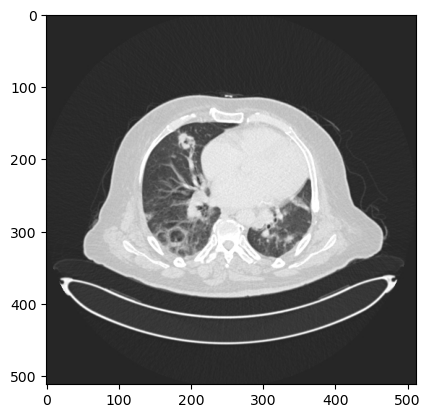

In [26]:
img = Image.open(r"/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (107).jpg")
Prediction(img)

96.56456112861633% Confidence Bengin Cases


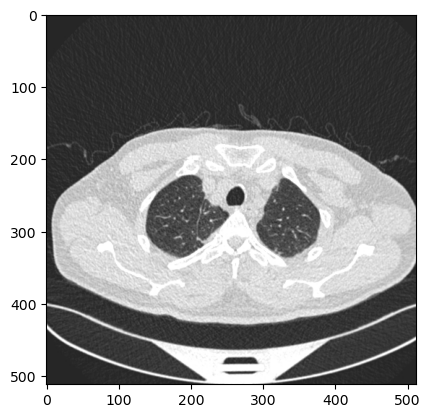

In [27]:
img = Image.open(r"/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (117).jpg")
Prediction(img)